# Moving Averages in Time Series

-  Noise Reduction: Moving averages effectively filter out random fluctuations and noise in time series data. Smoothing with moving averages helps analysts focus on underlying patterns rather than short-term fluctuations, aiding them in identifying meaningful trends.
-  Seasonal Decomposition: Decomposing time series data into its components often involves the use of moving averages. Seasonal decomposition techniques utilize moving averages to extract seasonal patterns from the data. Additionally, moving averages can help identify cyclic components in time series data, representing repeating patterns that are not strictly seasonal.
-  Forecasting: Moving averages are a fundamental component of various forecasting models.
-  Filtering Outliers: Moving averages can be used to identify and filter out outliers in time series data. Unusual data points that deviate significantly from the moving average may be considered outliers and warrant further investigation.
-  Smoothing for Visualization: When plotting time series data, moving averages are often employed to create smoother, cleaner visualizations. This can make it easier to communicate trends and patterns to a broader audience.
  
  

### Simple vs. Exponentially Weighted Moving Averages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

In [22]:
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = 16, 5

## Synthetic time series data 

- A duration of one year with daily observations
- Presence of recurring patterns (seasonality) within the time series
- Absence of any underlying trend
- A notable spike occurring between June 18th and June 23rd
- The introduction of random noise as the final step

In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

In [5]:
range_of_dates = pd.date_range(start="2022-01-01", end="2022-12-31")
X = pd.DataFrame(index=range_of_dates)

In [7]:
# Create a sequence of day numbers and add day of the year information
X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.dayofyear

In [8]:
# Generate components of the target time series
signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

In [9]:
# Combine the components to get the target series
y = signal_1 + signal_2 + noise


In [11]:
# Add additional random noise to specific date range (June 18 - June 23)
peak_mask = (y.index.month == 6) & (y.index.day >= 18) & (y.index.day <= 23)
y.loc[peak_mask] = y.loc[peak_mask] + np.random.normal(5, 1, len(y.loc[peak_mask]))

In [12]:
# Convert the target series to a DataFrame and assign a column name
y = y.to_frame()
y.columns = ["y"]

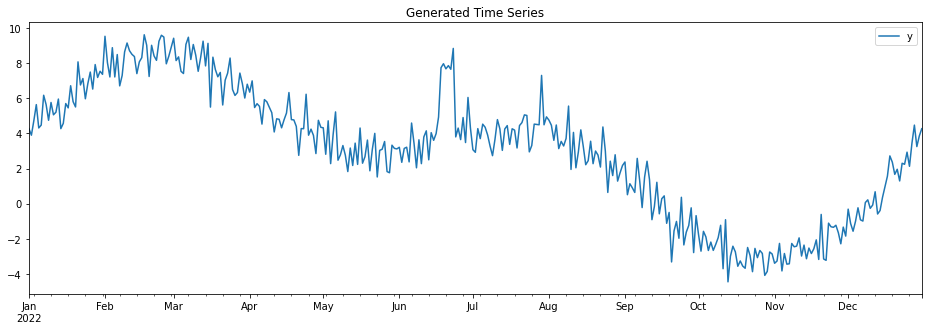

In [23]:
# Plot the generated time series
y.plot(title="Generated Time Series");

### Simple Moving Average

Defined a window size

- centered MA: 3 days moving average the average is t-1, t, t+1
- uncentered MA: 3 days t-2, t-1, and t

In [25]:
ma_df = y.copy()
WINDOW_SIZE = 7

ma_df["centered_ma"] = ma_df["y"].rolling(window=WINDOW_SIZE, center=True).mean()
ma_df["non_centered_ma"] = ma_df["y"].rolling(window=WINDOW_SIZE, center=False).mean()

ma_df.head()

,y,centered_ma,non_centered_ma
2022-01-01,4.273237,NaN,NaN
2022-01-02,3.900877,NaN,NaN
2022-01-03,4.735163,NaN,NaN
2022-01-04,5.644148,4.788753,NaN
2022-01-05,4.314070,4.984889,NaN


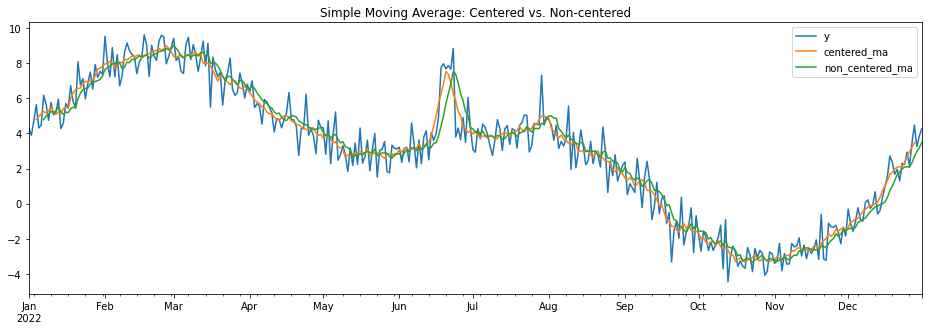

In [26]:
ma_df.plot(title="Simple Moving Average: Centered vs. Non-centered");

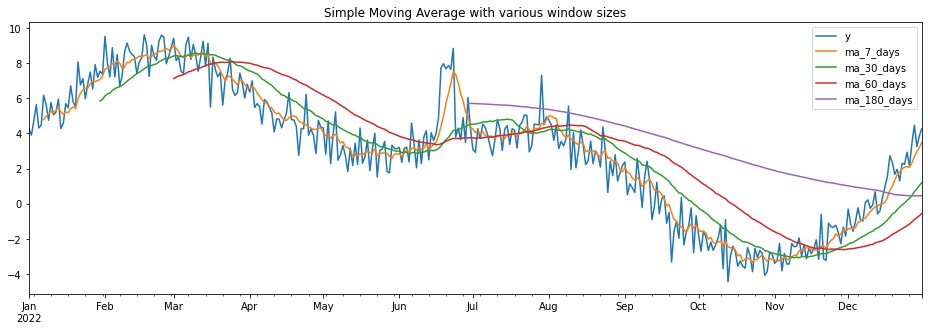

In [32]:
ma_df = y.copy()

for window in [7, 30, 60, 180]:
    ma_df[f"ma_{window}_days"] = ma_df["y"].rolling(window=window).mean()

ma_df.plot(title="Simple Moving Average with various window sizes");

We need X observations to create an X-period moving average. That is why the 180-day moving average only starts in the middle of the year. We can adjust that behavior using the min_periods argument of the rolling method.

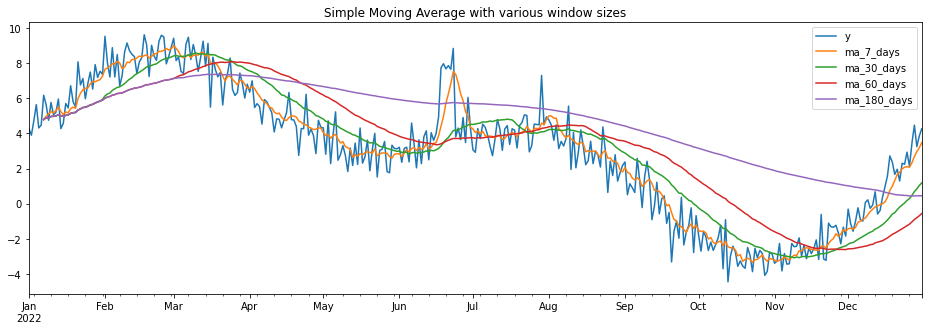

In [31]:
ma_df = y.copy()

for window in [7, 30, 60, 180]:
    ma_df[f"ma_{window}_days"] = ma_df["y"].rolling(min_periods=7, window=window).mean()

ma_df.plot(title="Simple Moving Average with various window sizes");

### Exponentially Weighted Moving Average

EWMA assigns exponentially decreasing weights to data points, giving more weight to recent observations and less to older ones. This makes EWMA more responsive to recent changes in the data compared to the Simple Moving Average.

Exponentially Weighted Moving Average (EWMA) using the smoothing parameter alpha. An adjusted factor addresses any imbalance in the relative weightings by dividing by the decaying smoothing factor during the initial periods.

The higher the alpha, the more responsive the curve becomes to recent data points. This behavior occurs because higher alpha values place greater emphasis on recent observations, causing the curve to closely follow data fluctuations. Conversely, lower alpha values give more weight to historical observations, resulting in a smoother curve that lags behind the data’s fluctuations.

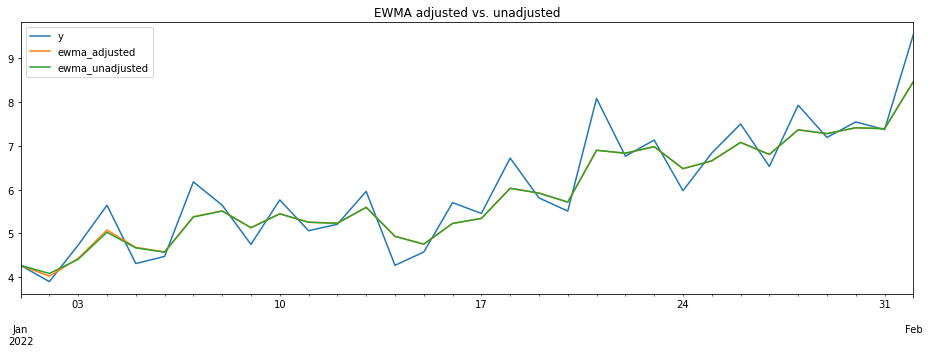

In [33]:
ewma_df = y.copy()

ewma_df["ewma_adjusted"] = ewma_df['y'].ewm(alpha=0.5, adjust=True).mean()
ewma_df["ewma_unadjusted"] = ewma_df['y'].ewm(alpha=0.5, adjust=False).mean()


ewma_df.loc["2022-01-01":"2022-02-01"].plot(title="EWMA adjusted vs. unadjusted");

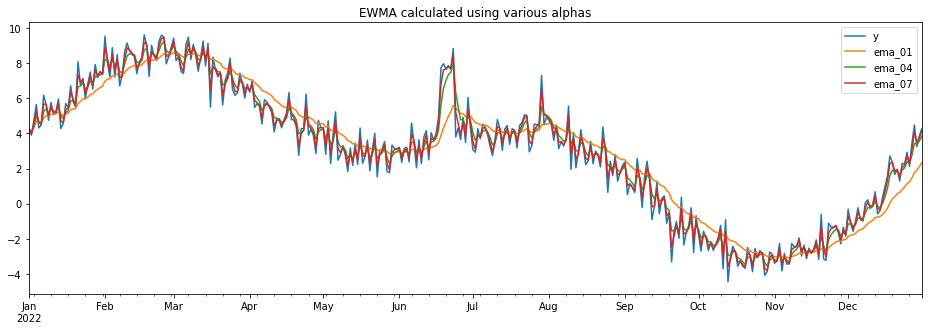

In [34]:
ewma_df = y.copy()
ALPHA_LIST = [0.1, 0.4, 0.7]

for alpha in ALPHA_LIST:
    ewma_df[f'ema_{str(alpha).replace(".", "")}'] = ewma_df['y'].ewm(alpha=alpha).mean()


ewma_df.plot(title="EWMA calculated using various alphas");

### References


[Moving Averages](https://medium.com/towards-data-science/the-comprehensive-guide-to-moving-averages-in-time-series-analysis-3fb2baa749a)